In [2]:
# Tanawat Panitpongsri UID 7060636642

In [3]:
# HW 5 ECON425T

# Problem 2

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as smo
import patsy as pt
import statsmodels.stats.api as sms
from simple_colors import *
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import truncnorm
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.optimize import minimize_scalar
from sklearn.linear_model import LassoCV, RidgeCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn import tree  
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

## (i)

In [11]:
df = pd.read_csv("card_transdata.csv")

In [12]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


In [13]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

In [14]:
y = df[["fraud"]].copy()
X = df.drop("fraud", axis = 1)

categorical_feature_names = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']
categorical_features_indices = [X.columns.get_loc(name) for name in categorical_feature_names]

In [15]:
na_count = X.isnull().sum()
print(na_count)

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64


In [16]:
# Splitting features and target variable into training and testing sets
X_train = X[:500000]
X_test = X[500000:]

y_train = y[:500000]
y_test = y[500000:]

In [17]:
# Dictionary to store oversampled data for each ratio
oversampled_data = {}

# Iterate over desired ratios for gamma
for gamma in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    # Initialize SMOTENC with categorical feature indices and sampling strategy
    smotenc = SMOTENC(categorical_features=categorical_features_indices, sampling_strategy=gamma, random_state=42)
    
    # Fit and resample the data
    X_resampled, y_resampled = smotenc.fit_resample(X_train, y_train)
    oversampled_data[gamma] = (X_resampled, y_resampled)

## (ii)

In [18]:
# To store the evaluation metrics for each gamma ratio
evaluation_metrics = {}

# Fit a decision tree and evaluate for each oversampled dataset
for gamma, (X_resampled, y_resampled) in oversampled_data.items():
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42) # 'entropy' for information gain

    # Fit the model on the oversampled training data
    clf.fit(X_resampled, y_resampled)

    # Make predictions on the training data and the original testing data
    train_predictions = clf.predict(X_resampled)
    test_predictions = clf.predict(X_test)

    # Calculate recall, precision, and F1 score for training data
    train_recall = recall_score(y_resampled, train_predictions)
    train_precision = precision_score(y_resampled, train_predictions)
    train_f1 = f1_score(y_resampled, train_predictions)

    # Calculate recall, precision, and F1 score for testing data
    test_recall = recall_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions)

    # Store the metrics
    evaluation_metrics[gamma] = {
        'training': {
            'recall': train_recall,
            'precision': train_precision,
            'f1': train_f1
        },
        'testing': {
            'recall': test_recall,
            'precision': test_precision,
            'f1': test_f1
        }
    }


In [19]:
evaluation_metrics

{0.1: {'training': {'recall': 1.0, 'precision': 1.0, 'f1': 1.0},
  'testing': {'recall': 0.9997027620267057,
   'precision': 0.9999542595769011,
   'f1': 0.9998284949863367}},
 0.2: {'training': {'recall': 1.0, 'precision': 1.0, 'f1': 1.0},
  'testing': {'recall': 0.9997027620267057,
   'precision': 0.9999542595769011,
   'f1': 0.9998284949863367}},
 0.3: {'training': {'recall': 1.0, 'precision': 1.0, 'f1': 1.0},
  'testing': {'recall': 0.9997256264861899,
   'precision': 0.9995884961821591,
   'f1': 0.9996570566313816}},
 0.4: {'training': {'recall': 1.0, 'precision': 1.0, 'f1': 1.0},
  'testing': {'recall': 0.9997484909456741,
   'precision': 0.9995885055894658,
   'f1': 0.9996684918666194}},
 0.5: {'training': {'recall': 1.0, 'precision': 1.0, 'f1': 1.0},
  'testing': {'recall': 0.9998399487836107,
   'precision': 0.9994971543507577,
   'f1': 0.9996685221804382}},
 0.6: {'training': {'recall': 1.0, 'precision': 1.0, 'f1': 1.0},
  'testing': {'recall': 0.9997713554051583,
   'precisi

In [20]:
# Convert the dictionary into a DataFrame
evaluation_df = pd.DataFrame.from_dict({(i,j): evaluation_metrics[i][j] 
                                        for i in evaluation_metrics.keys() 
                                        for j in evaluation_metrics[i].keys()},
                                       orient='index')

# Reset index to turn the multi-level index into columns
evaluation_df.reset_index(inplace=True)

# Rename columns to reflect the structure
evaluation_df.columns = ['Gamma', 'Dataset', 'Recall', 'Precision', 'F1']

# If you want to have separate columns for training and testing metrics, you can pivot the table
evaluation_df_pivot = evaluation_df.pivot(index='Gamma', columns='Dataset', values=['Recall', 'Precision', 'F1'])

# Flatten the columns to remove the multi-level index after pivot (optional step)
evaluation_df_pivot.columns = ['_'.join(col).strip() for col in evaluation_df_pivot.columns.values]

# Reset index to make 'Gamma' a column again (optional step)
evaluation_df_pivot.reset_index(inplace=True)

# Now, evaluation_df_pivot is a DataFrame with gamma as one of the columns and separate columns for
# each metric for both training and testing
evaluation_df_pivot

,Gamma,Recall_testing,Recall_training,Precision_testing,Precision_training,F1_testing,F1_training
0,0.1,0.999703,1.0,0.999954,1.0,0.999828,1.0
1,0.2,0.999703,1.0,0.999954,1.0,0.999828,1.0
2,0.3,0.999726,1.0,0.999588,1.0,0.999657,1.0
3,0.4,0.999748,1.0,0.999589,1.0,0.999668,1.0
4,0.5,0.999840,1.0,0.999497,1.0,0.999669,1.0
5,0.6,0.999771,1.0,0.999314,1.0,0.999543,1.0
6,0.7,0.999748,1.0,0.999269,1.0,0.999509,1.0
7,0.8,0.999726,1.0,0.999132,1.0,0.999429,1.0
8,0.9,0.999680,1.0,0.999223,1.0,0.999451,1.0
9,1.0,0.999748,1.0,0.999223,1.0,0.999486,1.0


From the results of the models, the recall and precision trade-off was observed from the desired ratio gamma.

## (iii)

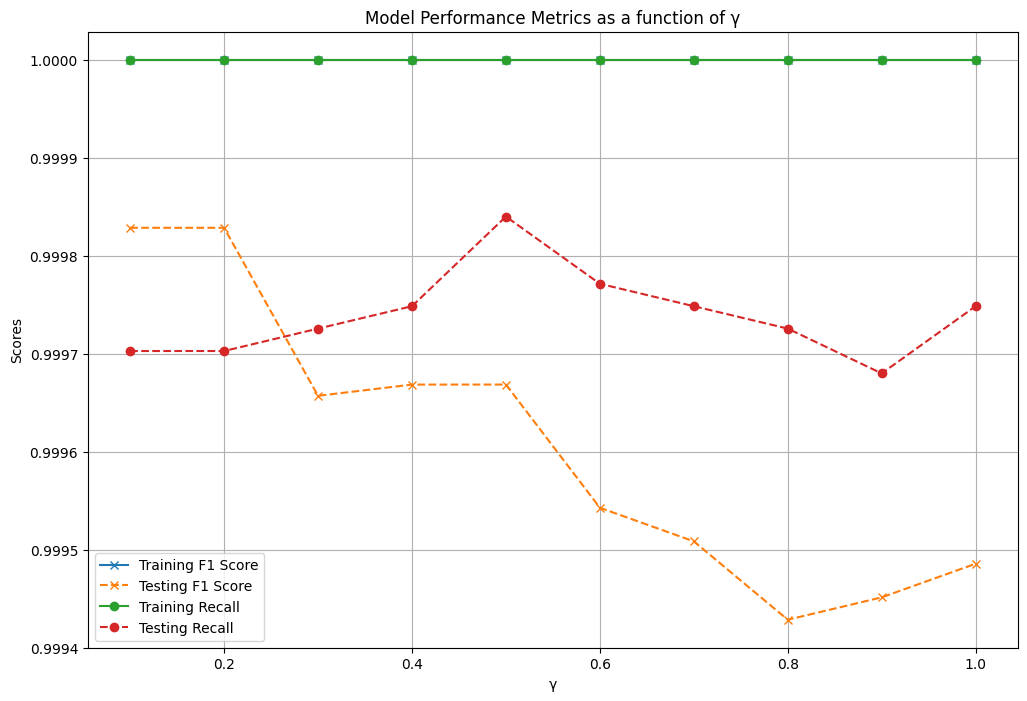

In [21]:
import matplotlib.pyplot as plt

# Lists to hold scores for plotting
gammas = []
train_f1_scores = []
test_f1_scores = []
train_recall_scores = []
test_recall_scores = []

# Extract F1 and recall scores for each gamma ratio
for gamma in sorted(evaluation_metrics.keys()):
    gammas.append(gamma)
    # F1
    train_f1_scores.append(evaluation_metrics[gamma]['training']['f1'])
    test_f1_scores.append(evaluation_metrics[gamma]['testing']['f1'])
    # Recall
    train_recall_scores.append(evaluation_metrics[gamma]['training']['recall'])
    test_recall_scores.append(evaluation_metrics[gamma]['testing']['recall'])

# Plotting the scores
plt.figure(figsize=(12, 8))

# F1 Scores
plt.plot(gammas, train_f1_scores, label='Training F1 Score', marker='x')
plt.plot(gammas, test_f1_scores, label='Testing F1 Score', linestyle='--', marker='x')

# Recall Scores
plt.plot(gammas, train_recall_scores, label='Training Recall', linestyle='-', marker='o')
plt.plot(gammas, test_recall_scores, label='Testing Recall', linestyle='--', marker='o')

# Adding title, labels, and legend
plt.title('Model Performance Metrics as a function of γ')
plt.xlabel('γ')
plt.ylabel('Scores')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [22]:
# Initialize the decision tree classifier with 'entropy' to use information gain
clf_no_oversampling = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fit the classifier on the original training data
clf_no_oversampling.fit(X_train, y_train.values.ravel())  # y_train needs to be ravelled if it's a column vector

# Predict on the training and test data
train_predictions_no_oversampling = clf_no_oversampling.predict(X_train)
test_predictions_no_oversampling = clf_no_oversampling.predict(X_test)

# Calculate performance metrics for the model without oversampling
metrics_no_oversampling = {
    'Train_Recall': recall_score(y_train, train_predictions_no_oversampling),
    'Train_Precision': precision_score(y_train, train_predictions_no_oversampling),
    'Train_F1': f1_score(y_train, train_predictions_no_oversampling),
    'Test_Recall': recall_score(y_test, test_predictions_no_oversampling),
    'Test_Precision': precision_score(y_test, test_predictions_no_oversampling),
    'Test_F1': f1_score(y_test, test_predictions_no_oversampling)
}

# Convert metrics to a DataFrame
evaluation_metrics_no_oversampling = pd.DataFrame([metrics_no_oversampling], index=['No Oversampling'])
print(evaluation_metrics_no_oversampling)


                 Train_Recall  Train_Precision  Train_F1  Test_Recall  \
No Oversampling           1.0              1.0       1.0     0.999726   

                 Test_Precision   Test_F1  
No Oversampling             1.0  0.999863  


From the graph, gamma = 0.1, 0.2 gave the highest testing F1 score while the higher gamma, which means the more number of samples in the minority class over the number of samples, gave the lower testing F1 score. This might be because of the overfitting issues from the oversampling. From the declining pattern over gamma, I could not conclude that SMOTE-NC helps improve the decision tree's performance even though the lowest testing F1 score is still at 99.94%; gamma = 0.8.

### However, for imbalanced data, we should try to maximize "recall" (minimize false negatives) since it might be worse if we have false negatives (cannot detect fraud). I also found that the testing recall score at gamma = 0.5 is higher than the testing recall from no oversampling case (99.984% > 99.726%). Hence, from this perspective, I can conclude that oversampling helps improve the decision tree's performance in preventing fraudulent transactions.

In [29]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Assuming oversampled_data is your dictionary of oversampled datasets
oversampled_data = {}  # This is just a placeholder for your actual oversampled data

# To store the evaluation metrics for each gamma ratio
evaluation_metrics = {}

# Additionally, to store the number of fraud predictions in the training set for each gamma
fraud_predictions_count = {}

for gamma, (X_resampled, y_resampled) in oversampled_data.items():
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42) # 'entropy' for information gain

    # Fit the model on the oversampled training data
    clf.fit(X_resampled, y_resampled)

    # Make predictions on the training data
    train_predictions = clf.predict(X_resampled)
    
    # Count the number of fraud predictions in the training set
    # Assuming '1' represents fraud
    train_fraud_count = sum(train_predictions == 1)
    fraud_predictions_count[gamma] = train_fraud_count

    # Make predictions on the original testing data
    test_predictions = clf.predict(X_test)

    # Calculate recall, precision, and F1 score for training data
    train_recall = recall_score(y_resampled, train_predictions)
    train_precision = precision_score(y_resampled, train_predictions)
    train_f1 = f1_score(y_resampled, train_predictions)

    # Calculate recall, precision, and F1 score for testing data
    test_recall = recall_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions)
    test_f1 = f1_score(y_test, test_predictions)

    # Store the metrics
    evaluation_metrics[gamma] = {
        'training': {
            'recall': train_recall,
            'precision': train_precision,
            'f1': train_f1
        },
        'testing': {
            'recall': test_recall,
            'precision': test_precision,
            'f1': test_f1
        }
    }

# After running the loop, you have the fraud prediction counts for each gamma
print("Fraud Predictions in Training Set for each Gamma:")
for gamma, count in fraud_predictions_count.items():
    print(f"Gamma: {gamma}, Fraud Predictions: {count}")


Fraud Predictions in Training Set for each Gamma:
